<a href="https://colab.research.google.com/github/EdioHub/Transfusion/blob/main/meus_aprendizados_transfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading all we need...
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

from sklearn.tree import plot_tree

# Transfusion


.....

In [ ]:
dataset = pd.read_csv('transfusion.csv')

In [ ]:
dataset


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Pré processamento

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
#valores sem repetir
dataset['Monetary (c.c. blood)'].unique()

array([12500,  3250,  4000,  5000,  6000,  1000,  1750,  3000,  2250,
       11500,  5750,   750,  2500,  1500,  1250,  3500,  3750,  2750,
        2000,   500,  4750,  4250,   250,  5500,  4500,  9500, 10750,
        8500, 11000,  6500, 10250,  5250,  8250])

In [ ]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [ ]:
dataset['Frequency (times)']

0      50
1      13
2      16
3      20
4      24
       ..
743     2
744     2
745     3
746     1
747     1
Name: Frequency (times), Length: 748, dtype: int64

In [ ]:
dataset.iloc[2:8, 1:4]

,Frequency (times),Monetary (c.c. blood),Time (months)
2,16,4000,35
3,20,5000,45
4,24,6000,77
5,4,1000,4
6,7,1750,14
7,12,3000,35


In [ ]:
dataset.shape

(748, 5)

In [ ]:
dataset.index

RangeIndex(start=0, stop=748, step=1)

In [ ]:
dataset.columns


Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [ ]:
dataset.count()

Recency (months)                              748
Frequency (times)                             748
Monetary (c.c. blood)                         748
Time (months)                                 748
whether he/she donated blood in March 2007    748
dtype: int64

In [ ]:
dataset.mean()

Recency (months)                                 9.506684
Frequency (times)                                5.514706
Monetary (c.c. blood)                         1378.676471
Time (months)                                   34.282086
whether he/she donated blood in March 2007       0.237968
dtype: float64

In [ ]:
dataset.median()

Recency (months)                                 7.0
Frequency (times)                                4.0
Monetary (c.c. blood)                         1000.0
Time (months)                                   28.0
whether he/she donated blood in March 2007       0.0
dtype: float64

In [ ]:
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

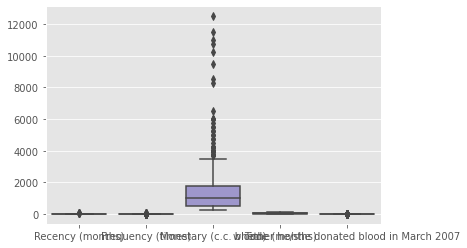

In [ ]:
sns.boxplot(data=dataset)

In [ ]:
dataset['Monetary (c.c. blood)'].min()

250

In [ ]:
dataset['Monetary (c.c. blood)'].max()

12500

**Normalização**

In [ ]:
#normalizar
dataset['Recency (months)'] = (dataset['Recency (months)'] -dataset['Recency (months)'].min()) / (dataset['Recency (months)'].max()-dataset['Recency (months)'].min())
dataset['Frequency (times)'] = (dataset['Frequency (times)'] -dataset['Frequency (times)'].min()) / (dataset['Frequency (times)'].max()-dataset['Frequency (times)'].min())
dataset['Monetary (c.c. blood)'] = (dataset['Monetary (c.c. blood)'] -dataset['Monetary (c.c. blood)'].min()) / (dataset['Monetary (c.c. blood)'].max()-dataset['Monetary (c.c. blood)'].min())
dataset['Time (months)'] = (dataset['Time (months)'] -dataset['Time (months)'].min()) / (dataset['Time (months)'].max()-dataset['Time (months)'].min())


In [ ]:
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.027027,1.000000,1.000000,1.000000,1
1,0.000000,0.244898,0.244898,0.270833,1
2,0.013514,0.306122,0.306122,0.343750,1
3,0.027027,0.387755,0.387755,0.447917,1
4,0.013514,0.469388,0.469388,0.781250,0
...,...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000,0
744,0.283784,0.020408,0.020408,0.520833,0
745,0.310811,0.040816,0.040816,0.625000,0
746,0.527027,0.000000,0.000000,0.385417,0


<AxesSubplot:>

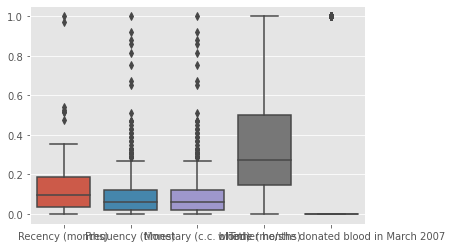

In [ ]:
sns.boxplot(data=dataset)


In [ ]:
#dataset = pd.read_csv('transfusion.csv')


# outliers

In [ ]:

boxplot_stats(dataset['Recency (months)']).pop(0)


{'mean': 0.1284687093510623,
 'iqr': 0.15202702702702703,
 'cilo': 0.08586750054652335,
 'cihi': 0.10332168864266585,
 'whishi': 0.35135135135135137,
 'whislo': 0.0,
 'fliers': array([0.47297297, 0.51351351, 0.51351351, 0.54054054, 1.        ,
        0.52702703, 0.97297297]),
 'q1': 0.037162162162162164,
 'med': 0.0945945945945946,
 'q3': 0.1891891891891892}

In [ ]:
boxplot_stats(dataset['Recency (months)']).pop(0)['fliers']

array([0.47297297, 0.51351351, 0.51351351, 0.54054054, 1.        ,
       0.52702703, 0.97297297])

In [ ]:
#valor em uma posição do fliers
np.where(dataset['Recency (months)']==boxplot_stats(dataset['Recency (months)']).pop(0)['fliers'][1])

(array([496, 497]),)

In [ ]:
#retirar a normalização
dataset = pd.read_csv('transfusion.csv')
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


Renomear

In [ ]:
dataset.rename(columns={"whether he/she donated blood in March 2007": "doação 2007"},inplace = True)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Normalização com lambda genérica sómente para conferência




In [ ]:
def data_Norm(df_input):
    return df_input.apply(lambda x: (x-x.min())/ x.max()-x.min(), axis=0)

dataPan_norm = data_Norm(dataset)
dataPan_norm

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,0.027027,-0.02,-249.02,-1.020408,1.0
1,0.000000,-0.76,-249.76,-1.734694,1.0
2,0.013514,-0.70,-249.70,-1.663265,1.0
3,0.027027,-0.62,-249.62,-1.561224,1.0
4,0.013514,-0.54,-249.54,-1.234694,0.0
...,...,...,...,...,...
743,0.310811,-0.98,-249.98,-1.632653,0.0
744,0.283784,-0.98,-249.98,-1.489796,0.0
745,0.310811,-0.96,-249.96,-1.387755,0.0
746,0.527027,-1.00,-250.00,-1.622449,0.0


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
#boxplot_stats(dataset['Recency (months)']).pop(0)['fliers']

In [ ]:
df_remove = dataset.loc[(dataset['Recency (months)'] >=35) ]
df_remove

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
495,35,3,750,64,0
496,38,1,250,38,0
497,38,1,250,38,0
498,40,1,250,40,0
499,74,1,250,74,0
746,39,1,250,39,0
747,72,1,250,72,0


In [ ]:
dataset = dataset.drop(df_remove.index)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [ ]:
#boxplot_stats(dataset['Monetary (c.c. blood)']).pop(0)

#Monetary (c.c. blood)

In [ ]:
#boxplot_stats(dataset['Monetary (c.c. blood)']).pop(0)['fliers']

In [ ]:
df_remove = dataset.loc[(dataset['Monetary (c.c. blood)'] >=3750) ]
df_remove

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
9,5,46,11500,98,1
10,4,23,5750,58,0
17,2,15,3750,49,1
34,2,16,4000,64,0
44,4,20,5000,69,1
55,4,19,4750,69,1


In [ ]:
dataset = dataset.drop(df_remove.index)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [ ]:
#boxplot_stats(dataset['Time (months)']).pop(0)

In [ ]:
#boxplot_stats(dataset['Time (months)']).pop(0)['fliers']

In [ ]:
df_remove = dataset.loc[(dataset['Time (months)'] >=95) ]
df_remove

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
131,2,12,3000,95,0
137,2,12,3000,98,0
439,18,8,2000,95,0
544,1,14,3500,95,0
605,4,11,2750,95,0


In [ ]:
dataset = dataset.drop(df_remove.index)
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


Diferentes formas de plotagem

<AxesSubplot:>

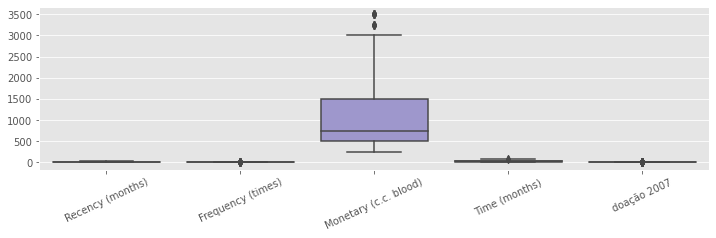

In [ ]:
#sns.boxplot(data=dataset)
plt.figure(figsize=(12, 3))
plt.style.use('ggplot')
plt.xticks(rotation=25)
sns.boxplot(data=dataset)

In [ ]:
#normalizar
dataset['Recency (months)'] = (dataset['Recency (months)'] -dataset['Recency (months)'].min()) / (dataset['Recency (months)'].max()-dataset['Recency (months)'].min())
dataset['Frequency (times)'] = (dataset['Frequency (times)'] -dataset['Frequency (times)'].min()) / (dataset['Frequency (times)'].max()-dataset['Frequency (times)'].min())
dataset['Monetary (c.c. blood)'] = (dataset['Monetary (c.c. blood)'] -dataset['Monetary (c.c. blood)'].min()) / (dataset['Monetary (c.c. blood)'].max()-dataset['Monetary (c.c. blood)'].min())
dataset['Time (months)'] = (dataset['Time (months)'] -dataset['Time (months)'].min()) / (dataset['Time (months)'].max()-dataset['Time (months)'].min())




<AxesSubplot:>

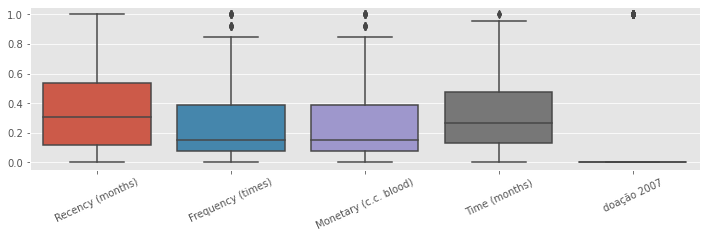

In [ ]:
#sns.boxplot(data=dataset)
plt.figure(figsize=(12, 3))
plt.style.use('ggplot')
plt.xticks(rotation=25)
sns.boxplot(data=dataset)

<AxesSubplot:>

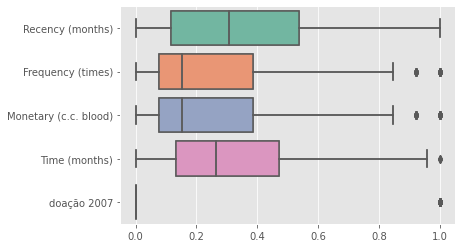

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=dataset, orient='h', palette='Set3') 
sns.boxplot(data=dataset ,orient='h', palette='Set2')

In [ ]:
#transformar em indices
#reqd_Index = dataset[dataset[dataset]>=35].index.tolist()
#print(reqd_Index)


In [ ]:
dataset = dataset.reset_index()
dataset

,index,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,1,0.000000,0.923077,0.923077,0.285714,1
1,5,0.153846,0.230769,0.230769,0.021978,0
2,6,0.076923,0.461538,0.461538,0.131868,1
3,7,0.038462,0.846154,0.846154,0.362637,0
4,8,0.076923,0.615385,0.615385,0.219780,1
...,...,...,...,...,...,...
686,741,0.884615,0.461538,0.461538,0.945055,0
687,742,0.615385,0.153846,0.153846,0.923077,0
688,743,0.884615,0.076923,0.076923,0.395604,0
689,744,0.807692,0.076923,0.076923,0.549451,0


In [ ]:
dataset.iloc[493:499,0:3]

,index,Recency (months),Frequency (times)
493,539,0.076923,0.076923
494,540,0.076923,0.384615
495,541,0.076923,0.692308
496,543,0.153846,0.076923
497,545,0.153846,0.076923
498,546,0.269231,1.000000


In [ ]:
dataset.columns.tolist()

['index',
 'Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)',
 'doação 2007']

<AxesSubplot:ylabel='Frequency'>

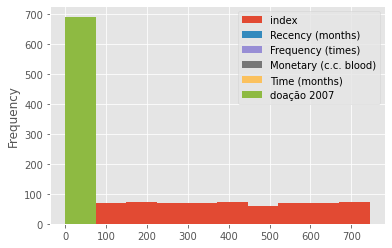

In [ ]:
dataset.plot.hist()

<AxesSubplot:ylabel='Frequency'>

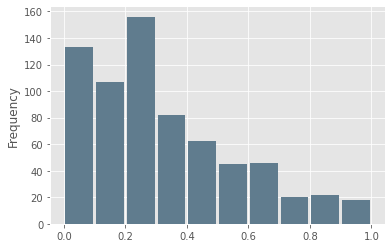

In [ ]:
dataset['Time (months)'].plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')

<AxesSubplot:ylabel='Frequency'>

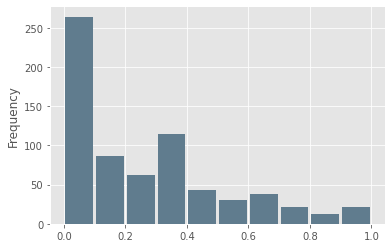

In [ ]:
dataset['Monetary (c.c. blood)'].plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')

# Aprendizados



In [ ]:
dataset

,index,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),doação 2007
0,1,0.000000,0.923077,0.923077,0.285714,1
1,5,0.153846,0.230769,0.230769,0.021978,0
2,6,0.076923,0.461538,0.461538,0.131868,1
3,7,0.038462,0.846154,0.846154,0.362637,0
4,8,0.076923,0.615385,0.615385,0.219780,1
...,...,...,...,...,...,...
686,741,0.884615,0.461538,0.461538,0.945055,0
687,742,0.615385,0.153846,0.153846,0.923077,0
688,743,0.884615,0.076923,0.076923,0.395604,0
689,744,0.807692,0.076923,0.076923,0.549451,0


In [ ]:
y = dataset['doação 2007']
dataset = dataset.drop(['doação 2007'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.1)

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
686    0
687    0
688    0
689    0
690    0
Name: doação 2007, Length: 691, dtype: int64

In [ ]:
X_train

,index,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
28,36,0.076923,0.846154,0.846154,0.494505
296,319,0.423077,0.307692,0.307692,0.428571
334,361,0.423077,0.076923,0.076923,0.241758
471,513,0.115385,1.000000,1.000000,0.362637
370,398,0.615385,0.538462,0.538462,0.813187
...,...,...,...,...,...
79,92,0.153846,0.076923,0.076923,0.021978
281,304,0.538462,0.384615,0.384615,0.351648
507,555,0.153846,0.230769,0.230769,0.175824
93,108,0.076923,0.153846,0.153846,0.131868


In [ ]:
X_test

,index,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
467,509,0.076923,0.923077,0.923077,0.329670
267,290,0.538462,0.230769,0.230769,0.230769
338,365,0.538462,0.076923,0.076923,0.208791
580,630,0.307692,0.615385,0.615385,0.681319
647,702,0.615385,0.000000,0.000000,0.153846
...,...,...,...,...,...
211,230,0.153846,0.000000,0.000000,0.021978
661,716,0.807692,0.076923,0.076923,0.263736
534,583,0.076923,0.000000,0.000000,0.000000
32,40,0.076923,0.923077,0.923077,0.560440


In [ ]:
y_train

28     1
296    0
334    0
471    0
370    0
      ..
79     0
281    0
507    0
93     0
25     1
Name: doação 2007, Length: 621, dtype: int64

In [ ]:
y_test

467    1
267    1
338    1
580    0
647    0
      ..
211    0
661    0
534    0
32     1
465    0
Name: doação 2007, Length: 70, dtype: int64

# KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 30)

scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.7987199180747568

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,52,1,53
1,14,3,17
All,66,4,70


# transfusion naive



;;;

In [ ]:
clf = GaussianNB(var_smoothing = 1e-3)

scores = cross_val_score(clf, X_train, y_train, cv=50)
np.mean(scores)

0.7730769230769232

In [ ]:
clf.fit(X_train, y_train)

GaussianNB(var_smoothing=0.001)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,53,53
1,17,17
All,70,70


# transfusion arvore

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini')

scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.719815668202765

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,43,10,53
1,14,3,17
All,57,13,70


[Text(0.5313426383399209, 0.9761904761904762, 'x[1] <= 0.25\ngini = 0.351\nsamples = 621\nvalue = [480, 141]'),
 Text(0.25660820158102765, 0.9285714285714286, 'x[0] <= 40.0\ngini = 0.463\nsamples = 299\nvalue = [190, 109]'),
 Text(0.03162055335968379, 0.8809523809523809, 'x[1] <= 0.058\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.015810276679841896, 0.8333333333333334, 'x[0] <= 4.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.007905138339920948, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.023715415019762844, 0.7857142857142857, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.04743083003952569, 0.8333333333333334, 'x[1] <= 0.115\ngini = 0.33\nsamples = 24\nvalue = [5, 19]'),
 Text(0.039525691699604744, 0.7857142857142857, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.05533596837944664, 0.7857142857142857, 'x[0] <= 30.0\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.04743083003952569, 0.7380952380952381, 'x[2] <= 0.808\n

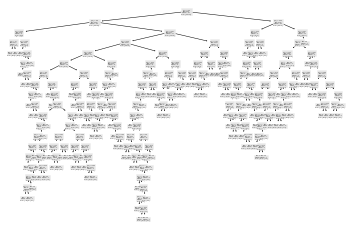

In [ ]:
plot_tree(clf)